In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_rows  # nr max de linhas exibidas

60

In [4]:
pd.options.display.max_columns = 37  # nr max de colunas exibidas

In [6]:
# open csv file
arquivo_csv = 'dados_5-6m.csv'

original = pd.read_csv(arquivo_csv, ';')

In [7]:
df = original.copy()

In [8]:
df.head

<bound method NDFrame.head of            Data  Palmeira  Altura Palmeira (m)     Área  Quadrante  Número  \
0      7/2/2020       6.0                  6.0     Copa        1.0  4763.0   
1      7/2/2020       6.0                  6.0     Copa        2.0     NaN   
2      7/2/2020       6.0                  6.0     Copa        3.0     NaN   
3      7/2/2020       6.0                  6.0     Copa        4.0  4765.0   
4      7/2/2020       6.0                  6.0     Copa        4.0  4767.0   
5      7/2/2020       6.0                  6.0  Externo        1.0  4769.0   
6      7/2/2020       6.0                  6.0  Externo        1.0  4770.0   
7      7/2/2020       6.0                  6.0  Externo        1.0  4771.0   
8      7/2/2020       6.0                  6.0  Externo        1.0  4772.0   
9      7/2/2020       6.0                  6.0  Externo        1.0  4773.0   
10     7/2/2020       6.0                  6.0  Externo        2.0  4774.0   
11     7/2/2020       6.0         

In [9]:
#linhas e colunas
df.shape

(1006, 38)

In [10]:
#TRATAMENTO DOS DADOS

In [11]:
# apenas palmeiras com altura entre 5 e 6 m
df = df[df['Altura Palmeira (m)'] == 6]

In [12]:
#drop all the columns where all the data is empty
df = df.dropna(how='all', axis='columns')

In [13]:
#Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [14]:
#Deleta Quadrantes e Numeros nulos
df.dropna(subset=['Quadrante', 'Número'], inplace=True)

In [15]:
#Deleta especies Pendentes 
df.drop(df[df['Espécie'] == 'Pendente'].index, inplace=True)

In [16]:
df.shape

(71, 14)

In [17]:
df.head()

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Obs,Identificação
0,7/2/2020,6.0,6.0,Copa,1.0,4763.0,Sapindaceae,Cupania,Cupania oblongifolia,22.0,"3,47",S,NaN,OK
3,7/2/2020,6.0,6.0,Copa,4.0,4765.0,Meliaceae,Guarea,Guarea macrophylla,27.0,"4,43",N,NaN,OK
4,7/2/2020,6.0,6.0,Copa,4.0,4767.0,Sapindaceae,Cupania,Cupania oblongifolia,20.0,"3,00",S,NaN,OK
5,7/2/2020,6.0,6.0,Externo,1.0,4769.0,Rubiaceae,Coffea,Coffea arabica,195.0,"24,80",N,NaN,OK
7,7/2/2020,6.0,6.0,Externo,1.0,4771.0,Rubiaceae,Psychotria,Psychotria suterella,20.0,"3,58",N,NaN,OK


In [18]:
#tipos de dados das colunas
print(df.dtypes)

Data                    object
Palmeira               float64
Altura Palmeira (m)    float64
Área                    object
Quadrante              float64
Número                 float64
Família                 object
Gênero                  object
Espécie                 object
Altura (cm)            float64
Dap (mm)                object
Coletada                object
Obs                     object
Identificação           object
dtype: object


In [21]:
#Ajustando os tipos de dados

#df['Estágio sucessional'] = df['Estágio sucessional'].astype(str)
#df['Nativa'] = df['Nativa'].astype(str)
df['Espécie'] = df['Espécie'].astype('str')
df['Gênero'] = df['Gênero'].astype(str)
df['Família'] = df['Família'].astype(str)
df['Quadrante'] = df['Quadrante'].astype(str)
df['Área'] = df['Área'].astype('category')
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].astype(str)
df['Palmeira'] = df['Palmeira'].astype(str)
df['Dap (mm)'] = df['Dap (mm)'].astype(str)

#troca , por . no na coluna dap
df['Dap (mm)'] = df['Dap (mm)'].apply(lambda x: x.replace(',', '.'))
df['Dap (mm)'] = df['Dap (mm)'].astype('float64')



In [22]:
#tipos de dados ajustados
print(df.dtypes)

Data                     object
Palmeira                 object
Altura Palmeira (m)      object
Área                   category
Quadrante                object
Número                  float64
Família                  object
Gênero                   object
Espécie                  object
Altura (cm)             float64
Dap (mm)                float64
Coletada                 object
Obs                      object
Identificação            object
dtype: object


In [23]:
#new shape
df.shape

(71, 14)

In [25]:
#Ajuste valores ausentes nas colunas Estágio Sucessional e Nativa 
#df['Estágio sucessional'] =  df['Estágio sucessional'].apply(lambda x: x.replace('nan', 'indeterminado'))
#df['Estágio sucessional'] =  df['Estágio sucessional'].fillna('indeterminado')
#df['Nativa'] =  df['Nativa'].apply(lambda x: x.replace('nan', 'indeterminado'))
#df['Nativa'] =  df['Nativa'].fillna('indeterminado')

In [26]:
#Ajustar Area externa para 'Entorno'
df['Área'] =  df['Área'].apply(lambda x: x.replace('Externo', 'Entorno'))

In [27]:
#Remove decimal do nome da palmeira e da altura da palmeira 
df['Palmeira'] = df['Palmeira'].apply(lambda x: x.split('.')[0]) 
df['Altura Palmeira (m)'] = df['Altura Palmeira (m)'].apply(lambda x: x.split('.')[0]) 

In [28]:
df.head(190)

,Data,Palmeira,Altura Palmeira (m),Área,Quadrante,Número,Família,Gênero,Espécie,Altura (cm),Dap (mm),Coletada,Obs,Identificação
0,7/2/2020,6,6,Copa,1.0,4763.0,Sapindaceae,Cupania,Cupania oblongifolia,22.0,3.47,S,NaN,OK
3,7/2/2020,6,6,Copa,4.0,4765.0,Meliaceae,Guarea,Guarea macrophylla,27.0,4.43,N,NaN,OK
4,7/2/2020,6,6,Copa,4.0,4767.0,Sapindaceae,Cupania,Cupania oblongifolia,20.0,3.00,S,NaN,OK
5,7/2/2020,6,6,Entorno,1.0,4769.0,Rubiaceae,Coffea,Coffea arabica,195.0,24.80,N,NaN,OK
7,7/2/2020,6,6,Entorno,1.0,4771.0,Rubiaceae,Psychotria,Psychotria suterella,20.0,3.58,N,NaN,OK
8,7/2/2020,6,6,Entorno,1.0,4772.0,Sapindaceae,Cupania,Cupania oblongifolia,37.0,4.54,N,NaN,OK
9,7/2/2020,6,6,Entorno,1.0,4773.0,Monimiaceae,Mollinedia,Mollinedia uleana,58.0,10.80,S,NaN,OK
10,7/2/2020,6,6,Entorno,2.0,4774.0,Sapindaceae,Allophylus,Allophylus edulis,400.0,45.40,S,idem 4774,OK
11,7/2/2020,6,6,Entorno,2.0,4775.0,Rubiaceae,Coffea,Coffea arabica,48.0,4.38,N,NaN,OK
13,7/2/2020,6,6,Entorno,2.0,4778.0,Monimiaceae,Mollinedia,Mollinedia uleana,160.0,20.20,S,NaN,OK


In [31]:
#contar registros em cada grupo
df['Área'].value_counts()

Entorno    48
Copa       23
Name: Área, dtype: int64

In [32]:
#contar registros em cada coluna - área da copa
df[df['Área'] == 'Copa'].count()

Data                   23
Palmeira               23
Altura Palmeira (m)    23
Área                   23
Quadrante              23
Número                 23
Família                23
Gênero                 23
Espécie                23
Altura (cm)            23
Dap (mm)               23
Coletada               23
Obs                     0
Identificação           3
dtype: int64

In [33]:
#contar registros em cada coluna - área do entorno
df[df['Área'] == 'Entorno'].count()

Data                   48
Palmeira               48
Altura Palmeira (m)    48
Área                   48
Quadrante              48
Número                 48
Família                48
Gênero                 48
Espécie                48
Altura (cm)            48
Dap (mm)               48
Coletada               48
Obs                     2
Identificação          12
dtype: int64

In [34]:
#STATISTICAS

In [35]:
#Altura
df['Altura (cm)'].describe()

count     71.000000
mean      83.464789
std      111.144543
min       20.000000
25%       24.000000
50%       48.000000
75%       83.000000
max      600.000000
Name: Altura (cm), dtype: float64

In [36]:
df['Dap (mm)'].describe()

count    71.000000
mean      8.563944
std       9.245972
min       2.000000
25%       3.485000
50%       4.660000
75%       9.705000
max      45.400000
Name: Dap (mm), dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd117b0d3c8>,
      dtype=object)

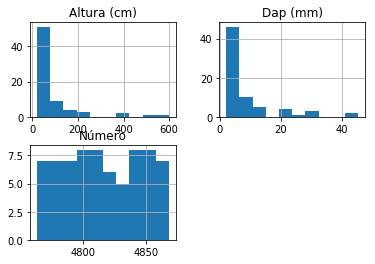

In [37]:
#histogramas das colunas numericas (Altura e Dap)
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd117af7b00>,
      dtype=object)

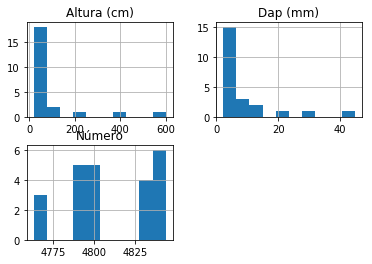

In [38]:
#histograma da altura e do dap da área da copa
df[df['Área'] == 'Copa'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1175cdac8>,
      dtype=object)

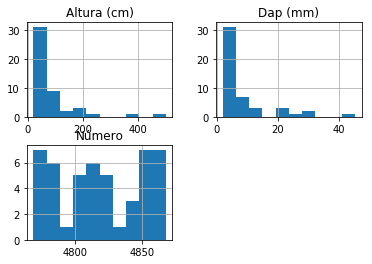

In [39]:
#histograma da altura e do dap do entorno
df[df['Área'] == 'Entorno'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1174b0438>,
      dtype=object)

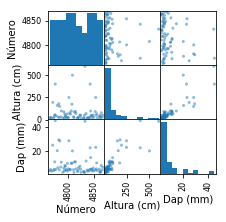

In [40]:
# exibe relacionamentos entre os atributos numericos 
from pandas.plotting import scatter_matrix

#figsize: tamanho da figura
#alpha: transparencia
scatter_matrix(df, alpha=0.5, figsize=(3, 3))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1172b7b38>,
      dtype=object)

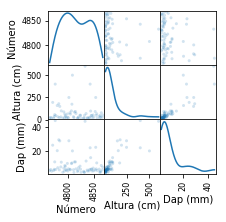

In [41]:
#KDE is a non-parametric way to estimate the probability density function of any variable we wish to view.
scatter_matrix(df, alpha=0.2, figsize=(3, 3), diagonal='kde')

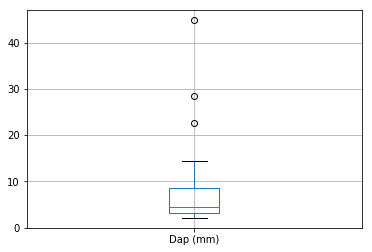

In [42]:
#box plot do dap do grupo copa
df[df['Área'] == 'Copa'].boxplot(column=['Dap (mm)'])

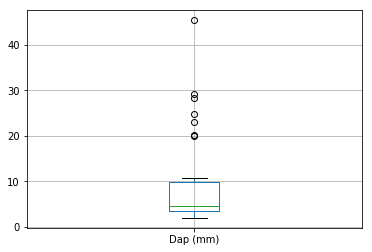

In [43]:
#box plot do dap do grupo entorno
df[df['Área'] == 'Entorno'].boxplot(column=['Dap (mm)'])

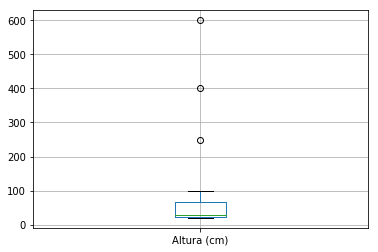

In [44]:
#box plot da altura do grupo copa
df[df['Área'] == 'Copa'].boxplot(column=['Altura (cm)'])

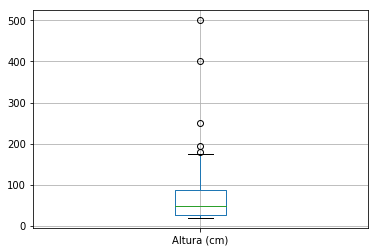

In [45]:
#box plot da altura do grupo entorno
df[df['Área'] == 'Entorno'].boxplot(column=['Altura (cm)'])

In [46]:
# media das alturas de cada grupo
df.groupby('Área')['Altura (cm)'].mean()

Área
Copa       88.782609
Entorno    80.916667
Name: Altura (cm), dtype: float64

In [47]:
# agrupar por grupo e altura minima
df.groupby('Área')['Altura (cm)'].min()

Área
Copa       20.0
Entorno    20.0
Name: Altura (cm), dtype: float64

In [48]:
#agrupar por grupo e altura max
df.groupby('Área')['Altura (cm)'].max()

Área
Copa       600.0
Entorno    500.0
Name: Altura (cm), dtype: float64

Text(0,0.5,'Quantidade')

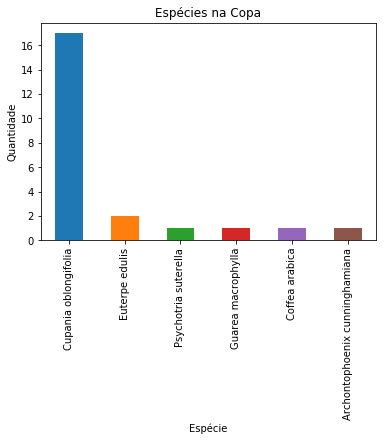

In [50]:
#Gráfico de barras da area das especies da area da copa ordenadas de forma descendente
plot_copa = df[df['Área'] == 'Copa']
plot_copa =  plot_copa[~plot_copa['Espécie'].isin(['Pendente'] )]
plot_copa = plot_copa.groupby('Espécie')['Número'].count() 
plot_copa = plot_copa[plot_copa > 0]
plot_copa = plot_copa.sort_values(ascending = False)

plot_copa.plot(kind='bar')
plt.title ("Espécies na Copa")
plt.ylabel("Quantidade")

Text(0,0.5,'Quantidade')

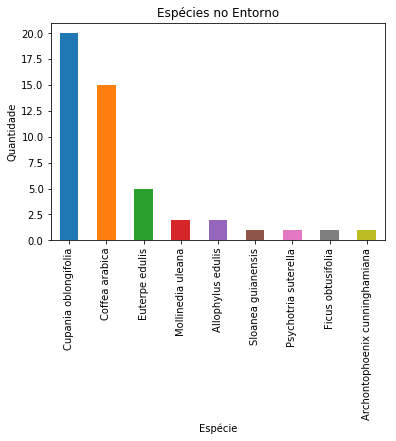

In [51]:
#Gráfico de barras da area das especies da area do entorno ordenadas de forma descendente
plot_entorno = df[['Área','Espécie','Número']]
plot_entorno= plot_entorno[plot_entorno['Área'] == 'Entorno']
plot_entorno = plot_entorno.groupby('Espécie')['Número'].count()
plot_entorno = plot_entorno[ plot_entorno > 0 ]
plot_entorno = plot_entorno.sort_values(ascending = False)

plot_entorno.plot(kind='bar')
plt.title ("Espécies no Entorno")
plt.ylabel("Quantidade")

ValueError: 'explode' must be of length 'x'

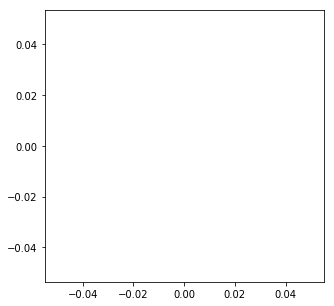

In [52]:
# Grafico de pizza om cores personalizadas relativo as especies da area da copa 

entorno = df[df['Área'] == 'Copa']
entorno = entorno[~entorno['Espécie'].isin(['Pendente'] )]
entorno = entorno.groupby('Espécie', as_index=False)['Número'].count() 
entorno = entorno[entorno > 0]
entorno = entorno.sort_values(by='Número',ascending = False)
entorno = entorno.dropna()

labels = entorno['Espécie'].tolist()

sizes =  entorno['Número'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.87,textprops=dict(color="black"))

plt.legend(pie[0],labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()


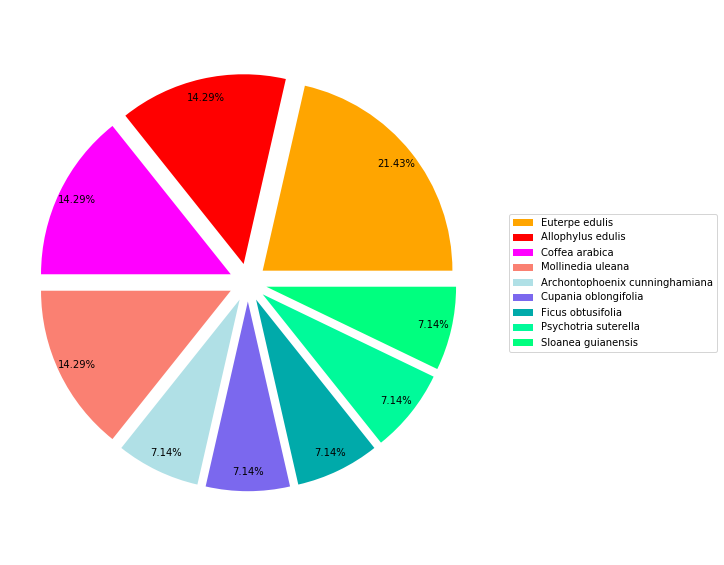

In [168]:
# Grafico de pizza om cores personalizadas relativo as especies da area da copa 

entorno = df[df['Área'] == 'Entorno']
entorno = entorno[~entorno['Espécie'].isin(['Pendente'] )]
entorno = entorno.groupby('Espécie', as_index=False)['Número'].count() 
entorno = entorno[entorno > 0]
entorno = entorno.sort_values(by='Número',ascending = False)
entorno = entorno.dropna()

labels = entorno['Espécie'].tolist()

sizes =  entorno['Número'].tolist()

explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#FF00FF', '#FA8072', '#B0E0E6', '#7B68EE', '#00AAAA',
          '#00FA9A', '#00FF7F']

fig, ax = plt.subplots(figsize=(8.5, 10))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.90,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()


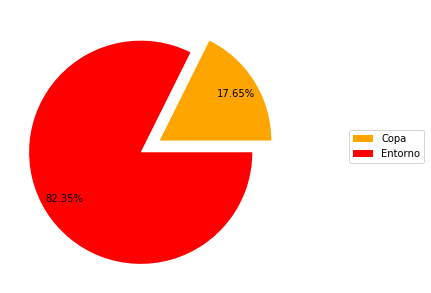

In [169]:
#Percentual de indivíduos arbóreos regenerantes sob a copa de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.

regenerantes_por_area = df[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_area = regenerantes_por_area.groupby('Área', as_index=False)['Número'].count() 
regenerantes_por_area = regenerantes_por_area[regenerantes_por_area > 0]
regenerantes_por_area = regenerantes_por_area.dropna()
regenerantes_por_area

labels = regenerantes_por_area['Área'].tolist()

sizes =  regenerantes_por_area['Número'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


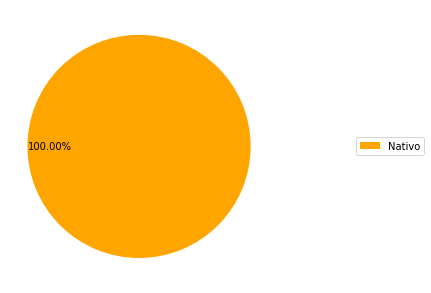

In [172]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos sob as copas de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df[df['Área'] == 'Copa']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()
regenerantes_por_origem

#labels = ['Exótico', 'Nativo', 'Não Classificado']
labels = ['Nativo']
sizes =  regenerantes_por_origem['Número'].tolist()

#explode = [0.1, 0.1, 0.1]
explode = [0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


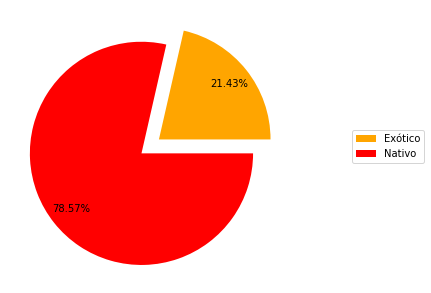

In [176]:
#Proporção de indivíduos arbóreos regenerantes nativos e exóticos no entorno palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_origem = df[df['Área'] == 'Entorno']
regenerantes_por_origem = regenerantes_por_origem[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_origem = regenerantes_por_origem.groupby('Nativa', as_index=False)['Número'].count() 
regenerantes_por_origem = regenerantes_por_origem[regenerantes_por_origem > 0]
regenerantes_por_origem = regenerantes_por_origem.dropna()
regenerantes_por_origem

#labels = ['Exótico', 'Nativo', 'Não Classificado']
labels = ['Exótico', 'Nativo']

sizes =  regenerantes_por_origem['Número'].tolist()

#explode = [0.1, 0.1, 0.1]
explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


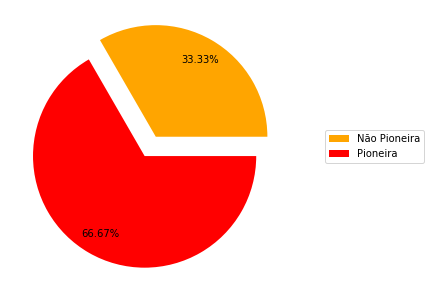

In [179]:
 #Proporção de indivíduos arbóreos regenerantes Pioneiros e Não Pioneiros sob as copas de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_estagio = df[df['Área'] == 'Copa']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()
regenerantes_por_estagio

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()

#explode = [0.1, 0.1, 0.1]

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

/home/tania/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


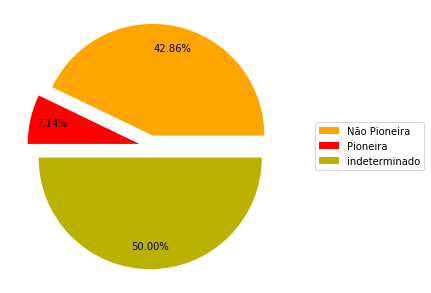

In [180]:
 #Proporção de indivíduos arbóreos regenerantes Pioneiros e Não Pioneiros no entorno de palmeiras Livistona chinensis de 3 m de altura e no entorno delas.
regenerantes_por_estagio = df[df['Área'] == 'Entorno']
regenerantes_por_estagio = regenerantes_por_estagio[~df['Espécie'].isin(['Pendente'] )]
regenerantes_por_estagio = regenerantes_por_estagio.groupby('Estágio sucessional', as_index=False)['Número'].count() 
regenerantes_por_estagio = regenerantes_por_estagio[regenerantes_por_estagio > 0]
regenerantes_por_estagio = regenerantes_por_estagio.dropna()
regenerantes_por_estagio

labels = regenerantes_por_estagio['Estágio sucessional'].tolist()

sizes =  regenerantes_por_estagio['Número'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [44]:
#Distribuição das espécies  regenerantes

#especies copa
all_copa = df[df['Área'] == 'Copa']
all_copa = all_copa[~all_copa['Espécie'].isin(['Pendente'] )]
all_copa = all_copa['Espécie']
all_copa = all_copa.drop_duplicates()

#especies entorno
all_entorno = df[df['Área'] == 'Entorno']
all_entorno = all_entorno[~all_entorno['Espécie'].isin(['Pendente'] )]
all_entorno = all_entorno['Espécie']
all_entorno = all_entorno.drop_duplicates()

#especies comuns nos dois grupos                     
comum_copa_entorno = all_copa[all_copa.isin(all_entorno)]
comum_copa_entorno

#especies exclusivas de determinada area
only_copa =  all_copa[~all_copa.isin(comum_copa_entorno)]
only_entorno =  all_entorno[~all_entorno.isin(comum_copa_entorno)]


In [45]:
#apenas copa
only_copa

197    Guarea macrophylla
Name: Espécie, dtype: object

In [46]:
#apenas entorno
only_entorno

199                    Coffea arabica
201              Psychotria suterella
203                 Mollinedia uleana
204                 Allophylus edulis
208                    Euterpe edulis
210                 Ficus obtusifolia
211    Archontophoenix cunninghamiana
214                Sloanea guianensis
Name: Espécie, dtype: object

In [47]:
#especies em comum
comum_copa_entorno

194    Cupania oblongifolia
Name: Espécie, dtype: object

In [48]:
#merge
only_copa_qtd = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [only_copa.count()] })

only_entorno_qtd = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [only_entorno.count()] })

comum_copa_entorno_qtd = pd.DataFrame({'Área': ['Ambos'],
                        'Quantidade': [comum_copa_entorno.count()] })

merge = [only_copa_qtd,only_entorno_qtd, comum_copa_entorno_qtd]
resultado_merge = pd.concat(merge)

resultado_merge

,Área,Quantidade
0,Copa,1
0,Entorno,8
0,Ambos,1


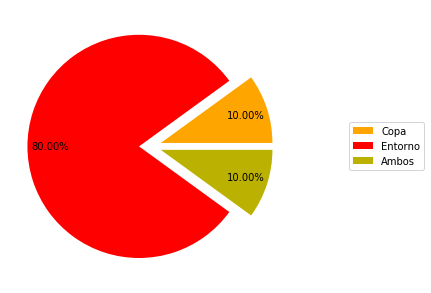

In [49]:
#grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1, 0.1]

colors = ['#FFA500', '#FF0000', '#BBB100']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()

In [53]:
#Proporcao de individuos regenerantes na copa e no entorno 

#copa
copa_total = df[df['Área'] == 'Copa']
copa_total = copa_total[~copa_total['Espécie'].isin(['Pendente'] )]
copa_total = copa_total[['Espécie','Número', 'Área']]

copa_total_consolidada = pd.DataFrame({'Área': ['Copa'],
                        'Quantidade': [copa_total['Número'].count()] })

#entorno
entorno_total = df[df['Área'] == 'Entorno']
entorno_total = entorno_total[~entorno_total['Espécie'].isin(['Pendente'] )]
entorno_total = entorno_total[['Espécie','Número', 'Área']]

entorno_total_consolidado = pd.DataFrame({'Área': ['Entorno'],
                        'Quantidade': [entorno_total['Número'].count()] })

merge = [copa_total_consolidada, entorno_total_consolidado]
resultado_merge = pd.concat(merge)

resultado_merge


,Área,Quantidade
0,Copa,3
0,Entorno,14


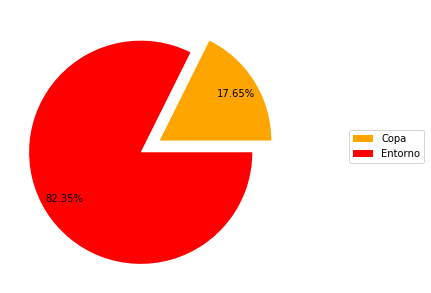

In [54]:
#Grafico

labels = resultado_merge['Área'].tolist()

sizes =  resultado_merge['Quantidade'].tolist()

explode = [0.1, 0.1]

colors = ['#FFA500', '#FF0000']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

pie = ax.pie(sizes, explode=explode, colors=colors,
             autopct='%1.2f%%', pctdistance =0.80,textprops=dict(color="black"))

plt.legend(pie[0], labels, bbox_to_anchor=(1.5,0.5), loc="right")

plt.show()